In [1]:
# cleans from noise and makes forecasts
# There should be no trend and seasonality
# F(t+1) = alpha * Y(t-1) + (1 - alpha) * F(t)
# alpha = smoothing parameter (0 <= alpha <= 1)

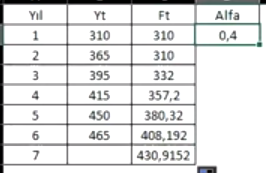

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch.unitroot import ADF, KPSS
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = yf.download("XU100.IS", period = "3Y", interval = "1d")["Close"]
data = pd.DataFrame(data)
data.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2021-01-29,1473.500000
2021-02-01,1492.500000
2021-02-02,1511.400024
2021-02-03,1533.599976
2021-02-04,1534.900024


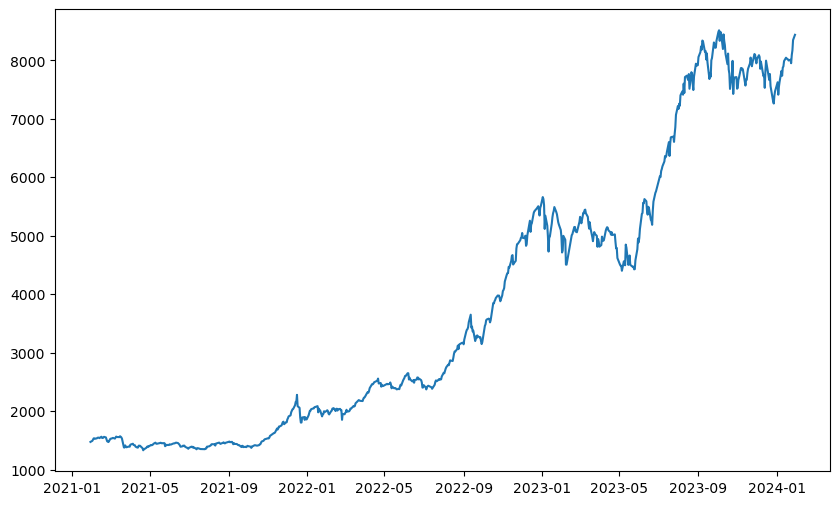

In [4]:
plt.figure(figsize = (10,6)) # there are trend and seasonality, so we can't use SES
plt.plot(data);

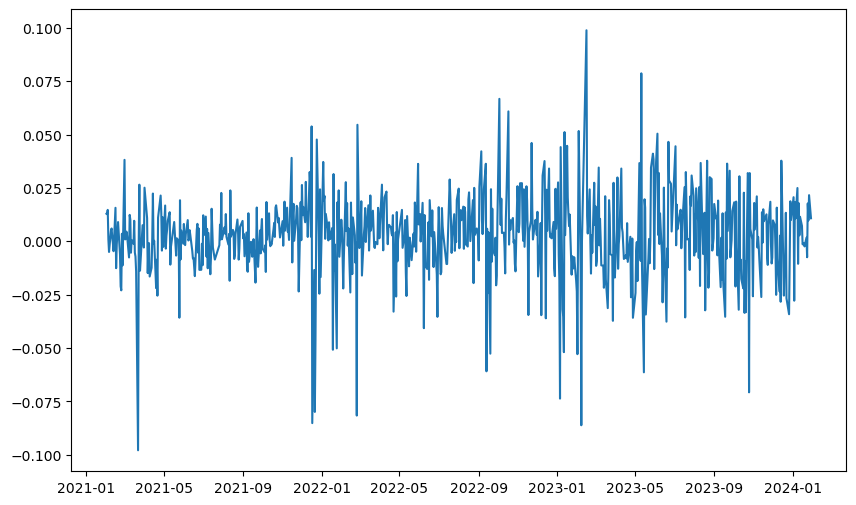

In [5]:
data["Return"] = data.pct_change()  # it seems like no trend and seasonality
data.dropna(inplace = True)

plt.figure(figsize = (10,6))
plt.plot(data["Return"]);

In [6]:
adf = ADF(data["Return"])
kpss = KPSS(data["Return"])

print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                -12.217
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.162
P-value                         0.355
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [7]:
# According to tests, the series is stationary, so we can use SES

In [8]:
ses = SimpleExpSmoothing(data["Return"])
model = ses.fit(smoothing_level = 0.2, optimized = False)
predict = model.forecast(5) # forecast for 5 terms
print(predict)

748    0.008678
749    0.008678
750    0.008678
751    0.008678
752    0.008678
dtype: float64


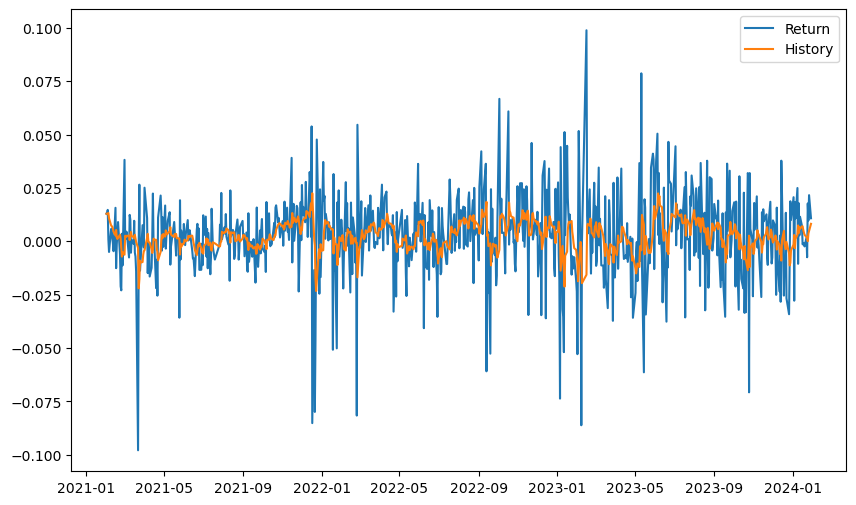

In [9]:
history = model.fittedvalues

plt.figure(figsize = (10,6))
plt.plot(data["Return"], label = "Return")
plt.plot(history, label = "History")
plt.legend();

In [10]:
alpha = np.arange(0, 1, 0.1)
rmse = []

for i in alpha:
    ses = SimpleExpSmoothing(data["Return"])
    model = ses.fit(smoothing_level = i, optimized = False)
    predict = model.fittedvalues
    rmse.append(np.sqrt(mean_squared_error(data["Return"], predict)))
    
opt_index = np.argmin(rmse)
opt_alpha = rmse[opt_index]
print(opt_alpha)

0.020041479290701228


In [11]:
data = data.reset_index(drop = False)

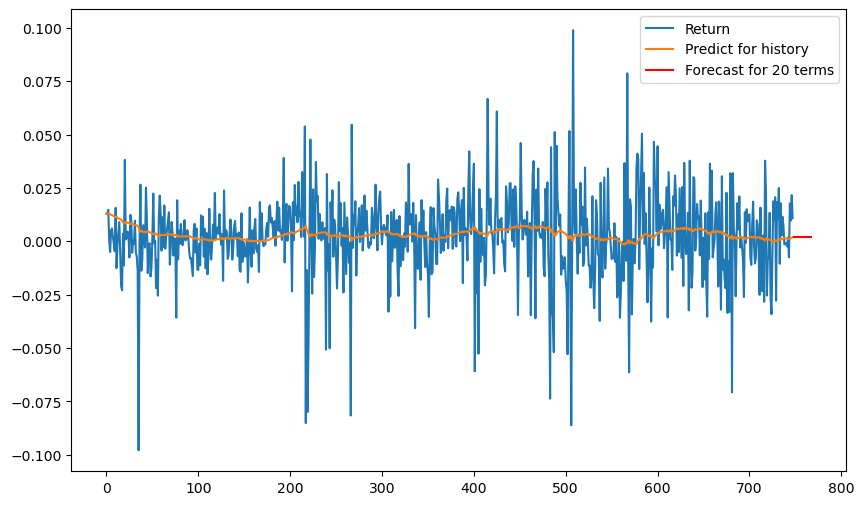

In [12]:
ses = SimpleExpSmoothing(data["Return"])
model = ses.fit(smoothing_level = 0.02, optimized = False)
predict = model.fittedvalues
forecast = model.forecast(20)

plt.figure(figsize = (10,6))
plt.plot(data["Return"], label = "Return")
plt.plot(predict, label = "Predict for history")
plt.plot(forecast, label = "Forecast for 20 terms", color = "r")
plt.legend();

In [13]:
# values in the future are around this value